In [1]:
# 데이터는 없지만 대충 시각화를 어떤 코드로 하면 될지 코드 짜보기

In [ ]:
자치구별 누적 확진자 비교
- 자치구별
- 누적 확진자
- 많이 나온 지역 top5
- 지하철 이용량 (지하철 - 지역구랑 묶어)

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

###  20.02 ~ 21.12 데이터 가져오기
#### 수홍님이 주신 데이터 

In [18]:
# 수홍님이 주신 데이터 
df = pd.read_csv("data/서울특별시 코로나19 자치구별 월별 확진자 발생동향(전체 합계)(최종).csv", encoding = 'cp949')

In [19]:
df

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
0,2022년 3월,26955,24391,39948,60090,70714,69378,76716,86479,55322,...,80998,47696,81957,78000,97142,76203,96021,128822,89107,1868123
1,2022년 2월,6310,5548,9872,15423,18404,16835,18563,21192,13579,...,18720,10535,18477,19719,23784,20096,26974,34449,25128,466825
2,2022년 1월,754,768,1424,1433,2017,1842,1780,2069,1110,...,2032,1059,1949,1973,2968,2374,3460,3388,2154,48129
3,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,2878,1891,3059,2590,3271,2489,3323,4252,2919,65000
4,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1935,1137,1932,1381,1732,1048,1218,1947,1519,32202
5,2021년 10월,509,359,433,454,514,1008,639,840,646,...,1575,665,1019,671,805,480,935,1016,950,17809
6,2021년 9월,401,539,412,587,877,917,668,746,555,...,1413,586,1127,705,1062,659,1243,1678,866,20001
7,2021년 8월,226,254,445,361,522,423,523,517,330,...,616,375,836,674,1009,668,1245,904,447,14205
8,2021년 7월,198,196,478,485,467,377,418,489,354,...,554,317,648,726,1102,772,1276,830,522,13706
9,2021년 6월,63,77,238,227,232,189,178,232,166,...,160,105,262,220,256,339,755,416,269,5737


In [24]:
# 22년 데이터 제거 
df = df[ (df['자치구 기준일'] != '2022년 3월') & (df['자치구 기준일'] != '2022년 2월')  & (df['자치구 기준일'] != '2022년 1월') ]

In [27]:
df.reset_index(inplace=True)

In [31]:
df.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
0,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,2878,1891,3059,2590,3271,2489,3323,4252,2919,65000
1,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1935,1137,1932,1381,1732,1048,1218,1947,1519,32202
2,2021년 10월,509,359,433,454,514,1008,639,840,646,...,1575,665,1019,671,805,480,935,1016,950,17809
3,2021년 9월,401,539,412,587,877,917,668,746,555,...,1413,586,1127,705,1062,659,1243,1678,866,20001
4,2021년 8월,226,254,445,361,522,423,523,517,330,...,616,375,836,674,1009,668,1245,904,447,14205


In [ ]:
# 월별 자치구별 확진자 --> 선 그래프
- x축 : 월별
- y축 : 확진자 수
- 선 모양으로 자치구별로 나타내기 

In [34]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

In [ ]:
구별로 인구수가 다른데 일괄적으로 확진자 수만 비교할 수 있을까? 
인구 수 대비 확진자 수로 비교를 해야하지 않을까?

In [35]:
df.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
0,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,2878,1891,3059,2590,3271,2489,3323,4252,2919,65000
1,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1935,1137,1932,1381,1732,1048,1218,1947,1519,32202
2,2021년 10월,509,359,433,454,514,1008,639,840,646,...,1575,665,1019,671,805,480,935,1016,950,17809
3,2021년 9월,401,539,412,587,877,917,668,746,555,...,1413,586,1127,705,1062,659,1243,1678,866,20001
4,2021년 8월,226,254,445,361,522,423,523,517,330,...,616,375,836,674,1009,668,1245,904,447,14205


In [ ]:
df.pivot_table

In [37]:
df.tail()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
18,2020년 6월,3,3,12,9,3,4,14,4,10,...,45,16,27,13,54,14,9,7,11,427
19,2020년 5월,3,3,20,21,6,3,3,5,9,...,6,3,11,9,16,4,10,11,11,216
20,2020년 4월,3,2,6,13,3,5,3,9,0,...,2,0,5,8,15,14,26,12,3,164
21,2020년 3월,2,4,12,3,4,25,12,13,5,...,32,11,18,22,25,20,32,13,6,351
22,2020년 2월,11,0,0,3,1,1,1,2,0,...,1,1,0,1,3,4,6,12,4,73


In [39]:
df.columns

Index(['자치구 기준일', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '전체 합계'],
      dtype='object')

In [40]:
gu = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

### 구별 누적 확진자 수 - 막대 그래프

In [47]:
gu_sum = pd.DataFrame(columns=['자치구','누적 확진자(20.02~21.12)'])

In [48]:
gu_sum

,자치구,누적 확진자(20.02~21.12)


In [46]:
# gu_sum.append({'자치구':'종로구', 
#               '누적 확진자(20.02~21.12)':3}, ignore_index=True)

,자치구,누적 확진자(20.02~21.12)
0,종로구,3


In [51]:
for i in gu:
    sum_of_gu = sum(df[i])
    gu_sum = gu_sum.append({'자치구':i, '누적 확진자(20.02~21.12)':sum_of_gu}, ignore_index=True)

In [52]:
# 구별 누적 확진자 (20.02 ~ 21.12)
gu_sum

,자치구,누적 확진자(20.02~21.12)
0,종로구,3973
1,중구,3671
2,용산구,5274
3,성동구,5707
4,광진구,7042
5,동대문구,9385
6,중랑구,8476
7,성북구,9488
8,강북구,6695
9,도봉구,6718


In [54]:
google_colors = ['#4285F4','#EA4335','#FBBC05','#34A853']

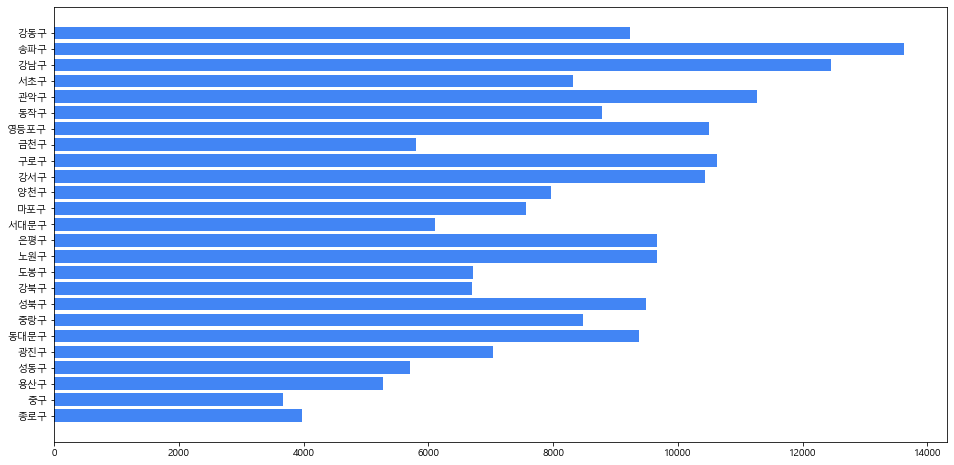

In [55]:
fig,ax = plt.subplots(figsize=(16,8))

ax.barh(y=gu_sum['자치구'],width=gu_sum['누적 확진자(20.02~21.12)'],color=google_colors[0])
plt.show()

In [ ]:
--> 단순히 누적 확진자 수로만 봤을 때 (20.02 ~ 21.12 약 2년간)
누적 확진자 수 순위
송파구
강남구
관악구
구로구
영등포구

In [79]:
threshold = 10000

In [80]:
tmp1 = gu_sum[gu_sum['누적 확진자(20.02~21.12)'] <= threshold].sort_values('누적 확진자(20.02~21.12)',ascending=True)
tmp2 = gu_sum[gu_sum['누적 확진자(20.02~21.12)'] > threshold].sort_values('누적 확진자(20.02~21.12)',ascending=True)

In [81]:
ax_font_dict = {'fontsize':12,'fontweight':'bold'}
title_font_dict = {'fontsize':18,'fontweight':'bold'}

In [82]:
yticks = list(np.arange(0,len(gu_sum)))
yticklabels = list(tmp1['자치구'])+list(tmp2['자치구'])

<ipython-input-83-a29ec8a3410d>:6: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_yticklabels(yticklabels, ax_font_dict)
<ipython-input-83-a29ec8a3410d>:7: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)
<ipython-input-83-a29ec8a3410d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)


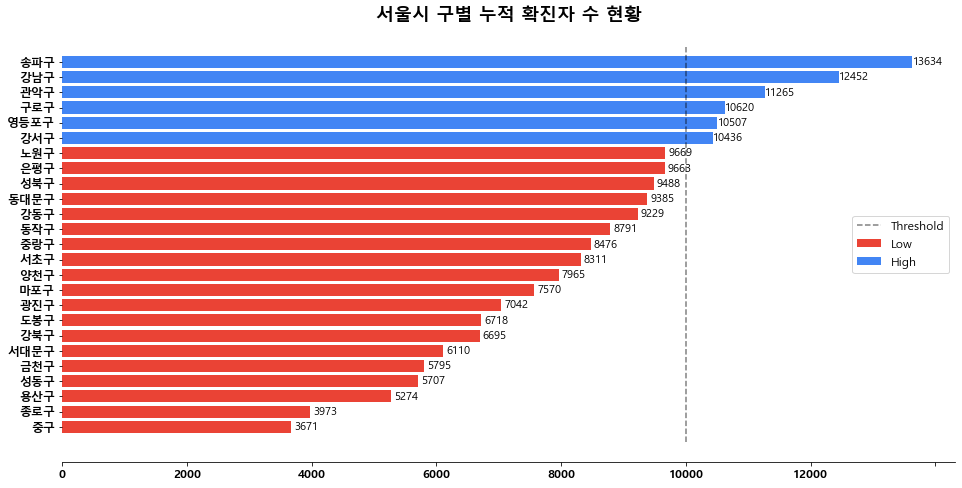

In [83]:
# 참고 : https://jehyunlee.github.io/2020/12/17/Python-DS-48-suneung/

fig, ax = plt.subplots(figsize=(16,8),sharex=True)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, ax_font_dict)
ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)

ax.barh(y=tmp1['자치구'],width=tmp1['누적 확진자(20.02~21.12)'], color=google_colors[1])
ax.barh(y=tmp2['자치구'],width=tmp2['누적 확진자(20.02~21.12)'], color=google_colors[0])

ax.vlines(threshold, ymin=-1, ymax=gu_sum['자치구'].nunique(), linestyles='dashed',alpha=0.5,color='black')
ax.set_title("서울시 구별 누적 확진자 수 현황", title_font_dict)

ax.legend(labels=["Threshold",'Low','High'], loc='center right',fontsize='large')

for i in yticks:
    xx = gu_sum.loc[gu_sum['자치구'] == yticklabels[i], '누적 확진자(20.02~21.12)'].values[0]
    ax.annotate(xx, xy = (xx, i), xytext = (15,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [ ]:
--> 서울시 구별 누적 확진자 수 현황 (높은 순위)
송파구
강남구
관악구
구로구
영등포구
강서구
threshold = 10000 으로 설정 

### 구별, 월별 누적 확진자 수 - plot

송파구
강남구
관악구
구로구
영등포구
강서구

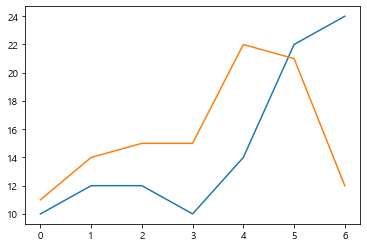

In [84]:
# 한 주의 요일(0: 일, 1: 월 ~ 6: 토)
days = [0, 1, 2, 3, 4, 5, 6]
# 내가 사용한 돈(천원)
money_spent = [10, 12, 12, 10, 14, 22, 24]
# 친구가 사용한 돈(천원)
money_spent_2 = [11, 14, 15, 15, 22, 21, 12]
# 내가 사용한 돈을 그래프로 그립니다
plt.plot(days, money_spent)
# 같은 그림에 친구가 사용한 돈도 그래프로 그립니다
plt.plot(days, money_spent_2)
# 화면에 그래프를 보여줍니다
plt.show()

In [ ]:
송파구
강남구
관악구
구로구
영등포구
강서구

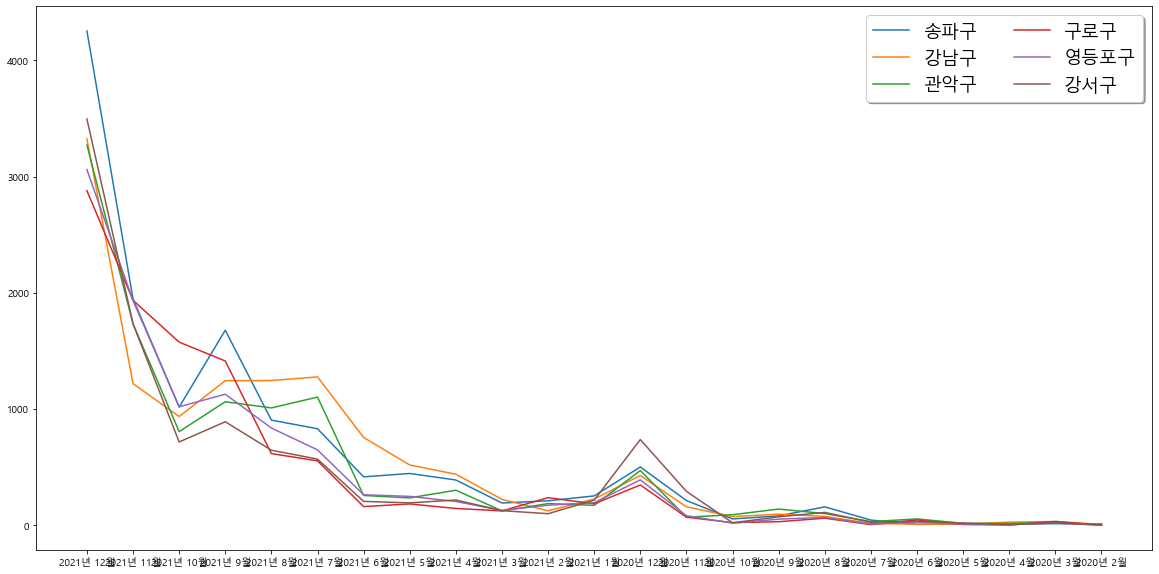

In [93]:
plt.figure(figsize=(20,10))
plt.plot(df['자치구 기준일'], df['송파구'], label = '송파구')
plt.plot(df['자치구 기준일'], df['강남구'], label = '강남구')
plt.plot(df['자치구 기준일'], df['관악구'], label = '관악구')
plt.plot(df['자치구 기준일'], df['구로구'], label = '구로구')
plt.plot(df['자치구 기준일'], df['영등포구'], label = '영등포구')
plt.plot(df['자치구 기준일'], df['강서구'], label = '강서구')
plt.legend(loc='best', ncol=2, fontsize=18, frameon=True, shadow=True)

plt.show()

In [85]:
df.head()

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
0,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,2878,1891,3059,2590,3271,2489,3323,4252,2919,65000
1,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1935,1137,1932,1381,1732,1048,1218,1947,1519,32202
2,2021년 10월,509,359,433,454,514,1008,639,840,646,...,1575,665,1019,671,805,480,935,1016,950,17809
3,2021년 9월,401,539,412,587,877,917,668,746,555,...,1413,586,1127,705,1062,659,1243,1678,866,20001
4,2021년 8월,226,254,445,361,522,423,523,517,330,...,616,375,836,674,1009,668,1245,904,447,14205


### 구별 누적 확진자 수 - 지도 시각화

In [94]:
import folium

In [95]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='cartodbpositron')
map

In [102]:
import json

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [113]:
gu_sum = gu_sum.set_index('자치구')

In [120]:
gu_sum.head()

,누적 확진자(20.02~21.12)
자치구,
종로구,3973
중구,3671
용산구,5274
성동구,5707
광진구,7042


In [ ]:
# https://mkjjo.github.io/python/2019/08/18/korea_population.html

In [119]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='Stamenterrain')

map.choropleth(geo_data = geo_str, 
               data = gu_sum['누적 확진자(20.02~21.12)'],
               columns = [gu_sum.index, gu_sum['누적 확진자(20.02~21.12)']],
               fill_color = 'YlGn',
               key_on = 'feature.id',
              legend_name = '누적 확진자 수')

map

### 지하철 이용량 시각화

In [1]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FC3B-0613

 C:\Users\Itshony\Desktop\LIKELION\SEMI1 디렉터리

2022-04-04  오후 05:04    <DIR>          .
2022-04-04  오후 05:04    <DIR>          ..
2022-04-04  오후 05:04    <DIR>          .ipynb_checkpoints
2022-04-01  오후 04:51           176,734 0401_전처리시도.ipynb
2022-04-04  오전 11:52           327,120 0404_gu_visual.ipynb
2022-04-04  오후 05:04           451,222 0404_지도시각화.ipynb
2022-04-01  오전 10:51            33,293 2호선_4년간_월별_시간대별_이용수.ipynb
2022-04-01  오후 01:04           104,249 2호선_데이터전처리.ipynb
2022-03-31  오전 09:07         2,815,986 Semi-project 관련 공지사항 & 활용 가능 데이터셋 링크 모음.pdf
2022-04-01  오전 10:31            33,293 Untitled.ipynb
2022-04-01  오전 10:13             2,136 Untitled1.ipynb
2022-04-04  오후 05:04                72 Untitled2.ipynb
2022-03-31  오후 04:51            16,929 멋사브레인_SEMI1.docx
2022-04-04  오후 03:05            79,551 서울시지하철정보.csv
2022-04-04  오후 03:03         8,569,756 서울시지하철호선별_역별_시간대별_승하차인원.csv
2022-04-01  오후 03:30           234,778 서울특별시 코로나19 

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import re

### 찬영님이 주신 데이터
- 서울시지하철정보.csv
서울시지하철호선별_역별_시간대별_승하차인원.csv

In [4]:
location = pd.read_csv("data/지하철역위치.csv")

In [5]:
location

,Data.Column1,Data.Column2,Data.Column3,Data.Column4,Data.Column5
0,철도운영기관명,선명,역명,지번주소,도로명주소
1,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55
2,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42
3,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238
4,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13
...,...,...,...,...,...
628,인천교통공사,인천2호선,모래내시장,인천광역시 남동구 구월동 341-6번지,인천광역시 남동구 구월로 255
629,인천교통공사,인천2호선,만수,인천광역시 남동구 만수동 993번지,인천 남동구 구월로 지하 367
630,인천교통공사,인천2호선,남동구청,인천광역시 남동구 만수동 1006번지,인천광역시 남동구 인주대로 889
631,인천교통공사,인천2호선,인천대공원,인천광역시 남동구 장수동 606-9,인천광역시 남동구 수인로 3687


In [6]:
location.rename({'Data.Column1':'철도운영기관명',
                'Data.Column2': '선명',
                'Data.Column3':'역명',
                'Data.Column4':'지번주소',
                'Data.Column5':'도로명주소'}, axis = 1, inplace=True)

In [7]:
location

,철도운영기관명,선명,역명,지번주소,도로명주소
0,철도운영기관명,선명,역명,지번주소,도로명주소
1,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55
2,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42
3,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238
4,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13
...,...,...,...,...,...
628,인천교통공사,인천2호선,모래내시장,인천광역시 남동구 구월동 341-6번지,인천광역시 남동구 구월로 255
629,인천교통공사,인천2호선,만수,인천광역시 남동구 만수동 993번지,인천 남동구 구월로 지하 367
630,인천교통공사,인천2호선,남동구청,인천광역시 남동구 만수동 1006번지,인천광역시 남동구 인주대로 889
631,인천교통공사,인천2호선,인천대공원,인천광역시 남동구 장수동 606-9,인천광역시 남동구 수인로 3687


In [8]:
location.drop(0, axis = 0, inplace=True)

In [9]:
location.head()

,철도운영기관명,선명,역명,지번주소,도로명주소
1,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55
2,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42
3,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238
4,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13
5,코레일,경의중앙,옥수,서울특별시 성동구 옥수동 168-1,서울특별시 성동구 동호로 21


In [11]:
station = pd.read_csv("data/서울시 지하철역 데이터.csv")

In [14]:
station.drop('Unnamed: 0', axis = 1, inplace=True)

In [15]:
station.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,5934,18,1028,0,0,0,0,0,0,20220303
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,1713,6,862,0,0,0,0,0,0,20220303
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,5067,21,413,0,0,0,0,0,0,20220303
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,835,3,78,0,0,0,0,0,0,20220303
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,3656,14,455,0,0,0,0,0,0,20220303


### 괄호안에 있는 거 제거

In [10]:
위치_역명 = list(location.역명.unique()) # 정규화 필요

In [12]:
지하철역 = list(station.지하철역.unique())

In [18]:
regex = "\(.*\)|\s-\s.*" 

text = '경복궁(정부서울청사)' # test
print(re.sub(regex, '', text)) 

경복궁


In [22]:
위치역명 = []
for i in 위치_역명:
    text = re.sub(regex, '', i)
    위치역명.append(text)

In [24]:
len(위치역명)

532

In [25]:
len(위치_역명)

532

In [26]:
len(지하철역)

284

### 지하철역 시간대별 정보 검색

In [28]:
for i in 지하철역:
    if i in 위치역명:
        pass
    else:
        print('없음', i)

In [ ]:
--> 없음 그대로 자치구 정보 합치기 

### 자치구 정보 추가

In [30]:
location.head()

,철도운영기관명,선명,역명,지번주소,도로명주소
1,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55
2,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42
3,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238
4,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13
5,코레일,경의중앙,옥수,서울특별시 성동구 옥수동 168-1,서울특별시 성동구 동호로 21


In [34]:
location.reset_index(inplace=True)

In [38]:
location.drop(['index','level_0'], axis = 1, inplace=True)

In [31]:
station.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,5934,18,1028,0,0,0,0,0,0,20220303
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,1713,6,862,0,0,0,0,0,0,20220303
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,5067,21,413,0,0,0,0,0,0,20220303
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,835,3,78,0,0,0,0,0,0,20220303
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,3656,14,455,0,0,0,0,0,0,20220303


In [39]:
# 자치구 열 생성 
location['자치구'] = location['지번주소'].apply(lambda x : x[6:10])

for i in range(len(location)):
    if '중구' in location.loc[i, '자치구']:
        location.loc[i, '자치구'] = '중구'
location['자치구'] = location['자치구'].apply(lambda x : x.rstrip())

In [56]:
location[ location['자치구'] == '을지로3']['자치구'] = '중구'

<ipython-input-56-c94631871214>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location[ location['자치구'] == '을지로3']['자치구'] = '중구'


In [60]:
location[ location['자치구'] == '중구']

,철도운영기관명,선명,역명,지번주소,도로명주소,자치구
53,코레일,경의중앙,서울역,서울특별시 중구 남대문로5가 73-6,서울특별시 세종대로 지하 2,중구
91,공항철도,공항,운서,인천광역시 중구 운서동 1427-27,인천광역시 중구 흰바위로 59번길 26,중구
92,공항철도,공항,공항화물청사,인천광역시 중구 운서동 2844-7,인천광역시 중구 공항동로 135번길 86,중구
93,공항철도,공항,인천국제공항,인천광역시 중구 운서동 2851,인천광역시 중구 공항로 271,중구
182,코레일,1호선,동인천,인천광역시 중구 인현동 1-613,인천광역시 중구 참외전로 121,중구
183,코레일,1호선,인천,인천광역시 중구 북성동1가 3-1,인천광역시 중구 제물량로 269,중구
227,서울교통공사,1호선,시청,서울특별시 중구 정동 5-5,서울특별시 세종대로 지하 101,중구
228,서울교통공사,1호선,서울역,서울특별시 중구 남대문로5가 73-6,서울특별시 세종대로 지하 2,중구
230,서울교통공사,2호선,시청,서울특별시 중구 서소문동 90-1,서울특별시 중구 서소문로 지하 127,중구
231,서울교통공사,2호선,을지로입구,서울특별시 중구 을지로3가 347-3,서울특별시 중구 을지로 지하 42,중구


In [41]:
location.자치구.unique()

array(['용산구', '성동구', '동대문구', '중랑구', '시 인창', '주시 도', '주시 이', '주시 와',
       '주시 조', '군 양서', '군 옥천', '군 양평', '군 용문', '군 지평', '마포구', '서대문구',
       '은평구', '시 덕양', '시 일산', '시 야당', '시 교하', '시 금촌', '시 월롱', '시 파주',
       '시 문산', '중구', '', '노원구', '시 갈매', '주시 별', '주시 퇴', '주시 진', '주시 금',
       '주시 평', '주시 화', '군 청평', '군 가평', '시 남산', '시 신동', '시 퇴계', '시 근화',
       '강서구', '계양구', '서구 검', '서구 경', '강남구', '송파구', '시 수정', '시 중원', '시 분당',
       '시 수지', '시 기흥', '시 영통', '시 권선', '시 팔달', '천시 상', '천시 동', '천시 보',
       '천시 생', '천시 지', '시 덕정', '시 덕계', '시 남방', '부시 녹', '부시 가', '부시 의',
       '부시 호', '도봉구', '동작구', '영등포구', '구로구', '시 원미', '시 소사', '부평구', '남동구',
       '남구 주', '남구 도', '남구 숭', '동구 창', '금천구', '시 만악', '시 만안', '시 금정',
       '시 당동', '시 당정', '시 삼동', '시 장안', '시 진암', '시 외삼', '시 세교', '시 수청',
       '시 오산', '시 진위', '시 신장', '시 서정', '시 지제', '시 평택', '안시 서', '안시 동',
       '산시 배', '산시 온', '산시 신', '종로구', '을지로3', '광진구', '서초구', '관악구', '시 과천',
       '시 별양', '시 동안', '시 산본', '시 대야', '시 상록', '시 단원', '시 정왕', '강북구',
 

In [ ]:
'을지로3' --> 확인 필요

In [47]:
gu = ['용산구', '성동구', '동대문구', '중랑구',  '마포구', '서대문구','은평구','노원구',  '강서구', '강남구', '송파구','도봉구', '동작구', '영등포구', '구로구', '금천구','종로구',  '광진구', '서초구', '관악구', 
    '강북구', '성북구', '양천구', '강동구', '중구']

In [48]:
len(gu)

25

In [62]:
location

,철도운영기관명,선명,역명,지번주소,도로명주소,자치구
0,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55,용산구
1,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42,용산구
2,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238,용산구
3,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13,용산구
4,코레일,경의중앙,옥수,서울특별시 성동구 옥수동 168-1,서울특별시 성동구 동호로 21,성동구
...,...,...,...,...,...,...
627,인천교통공사,인천2호선,모래내시장,인천광역시 남동구 구월동 341-6번지,인천광역시 남동구 구월로 255,남동구
628,인천교통공사,인천2호선,만수,인천광역시 남동구 만수동 993번지,인천 남동구 구월로 지하 367,남동구
629,인천교통공사,인천2호선,남동구청,인천광역시 남동구 만수동 1006번지,인천광역시 남동구 인주대로 889,남동구
630,인천교통공사,인천2호선,인천대공원,인천광역시 남동구 장수동 606-9,인천광역시 남동구 수인로 3687,남동구


In [66]:
for i in range(len(location)):
    text = re.sub(regex, '', location.at[i, '역명'])
    location.at[i,'역명'] = text

In [69]:
location.역명.unique()

array(['용산', '이촌', '서빙고', '한남', '옥수', '응봉', '왕십리', '청량리', '회기', '중랑',
       '상봉', '망우', '양원', '구리', '도농', '양정', '덕소', '도심', '팔당', '운길산', '양수',
       '신원', '국수', '아신', '오빈', '양평', '원덕', '용문', '지평', '효창공원앞', '공덕',
       '서강대', '홍대입구', '가좌', '디지털미디어시티', '수색', '화전', '강매', '행신', '능곡',
       '대곡', '곡산', '백마', '풍산', '일산', '탄현', '야당', '운정', '금릉', '금촌', '월롱',
       '파주', '문산', '서울역', '신촌', '역명', '광운대', '신내', '갈매', '별내', '퇴계원',
       '사릉', '금곡', '평내호평', '천마산', '마석', '대성리', '청평', '상천', '가평', '굴봉산',
       '백양리', '강촌', '김유정', '남춘천', '춘천', '김포공항', '계양', '검암', '청라국제도시',
       '영종', '운서', '공항화물청사', '인천국제공항', '서울숲', '압구정로데오', '강남구청', '선정릉',
       '선릉', '한티', '도곡', '구룡', '개포동', '대모산입구', '수서', '복정', '가천대', '태평',
       '모란', '야탑', '이매', '서현', '수내', '정자', '미금', '오리', '죽전', '보정', '구성',
       '신갈', '기흥', '상갈', '청명', '영통', '망포', '매탄권선', '수원시청', '매교', '수원',
       '소요산', '동두천', '보산', '동두천중앙', '지행', '덕정', '덕계', '양주', '녹양', '가능',
       '의정부', '회룡', '망월사', '도봉산', '도봉', '방학', '창동', '녹천', '월계', '석계',
  

In [70]:
location.to_csv("data/서울시지하철정보_ver2.csv", index=False)

### 지하철 시간대별 정보에 자치구 추가

In [ ]:
df['관서명'].apply(lambda x: police_to_gu.get(x, '구 없음'))

In [76]:
location.역명.head()

0     용산
1     이촌
2    서빙고
3     한남
4     옥수
Name: 역명, dtype: object

In [77]:
location.head()

,철도운영기관명,선명,역명,지번주소,도로명주소,자치구
0,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55,용산구
1,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42,용산구
2,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238,용산구
3,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13,용산구
4,코레일,경의중앙,옥수,서울특별시 성동구 옥수동 168-1,서울특별시 성동구 동호로 21,성동구


In [100]:
location[ location['역명'] == '이촌'].iloc[0]['자치구']

'용산구'

In [101]:
station['자치구'] = station['지하철역'].apply(lambda x: location[ location['역명'] == x].iloc[0]['자치구'])

In [112]:
station['자치구'].apply(if x =='을지로3' x = '중구')

SyntaxError: invalid syntax (<ipython-input-112-42dabb7da741>, line 1)

In [106]:
station.자치구.unique()

array(['종로구', '중구', '동대문구', '강남구', '광진구', '서초구', '구로구', '관악구', '영등포구',
       '성동구', '동작구', '서대문구', '마포구', '을지로3', '송파구', '은평구', '성북구', '노원구',
       '강북구', '용산구', '도봉구', '강동구', '강서구', '양천구', '군 양평', '중랑구', '금천구'],
      dtype=object)

In [ ]:
을지 = station[ station['자치구'] == '을지로3'].index

In [115]:
for i in 을지:
    station.loc[i, '자치구'] = '중구'

In [118]:
station.자치구.unique()

array(['종로구', '중구', '동대문구', '강남구', '광진구', '서초구', '구로구', '관악구', '영등포구',
       '성동구', '동작구', '서대문구', '마포구', '송파구', '은평구', '성북구', '노원구', '강북구',
       '용산구', '도봉구', '강동구', '강서구', '양천구', '군 양평', '중랑구', '금천구'],
      dtype=object)

In [121]:
station[ station['자치구'] == '군 양평']

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,자치구
146,202202,5호선,양평,1,0,1588,574,4641,2190,17312,...,0,25,0,0,0,0,0,0,20220303,군 양평
361,202202,중앙선,양평,20,0,970,55,2275,1358,4075,...,1,91,0,0,0,0,0,0,20220303,군 양평
510,202201,5호선,양평,0,0,1647,616,5309,2425,20798,...,0,26,0,0,0,0,0,0,20220203,군 양평
726,202201,중앙선,양평,19,1,1045,53,2541,1525,4581,...,4,97,0,0,0,0,0,0,20220203,군 양평
875,202112,5호선,양평,2,0,1836,653,5682,2554,22304,...,0,28,0,0,0,0,0,0,20220103,군 양평
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30076,201503,중앙선,양평,11,2,1681,31,2762,1604,17071,...,92,2002,0,0,0,0,0,0,20151223,군 양평
30224,201502,5호선,양평,1,0,2074,562,4852,2317,14629,...,224,1405,2,11,0,0,0,0,20151223,군 양평
30419,201502,중앙선,양평,9,1,1372,43,1809,1051,10184,...,141,1506,0,69,0,0,0,0,20151223,군 양평
30567,201501,5호선,양평,0,0,2533,684,5447,2778,16852,...,244,1740,0,0,0,0,0,0,20151223,군 양평


### 데이터 정제 확인

In [122]:
station.to_csv("data/서울시지하철호선별_역별_시간대별_승하차인원_ver2.csv", index=False)

In [123]:
df = pd.read_csv("data/서울시지하철호선별_역별_시간대별_승하차인원_ver2.csv")

In [124]:
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,자치구
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,18,1028,0,0,0,0,0,0,20220303,종로구
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,6,862,0,0,0,0,0,0,20220303,종로구
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,21,413,0,0,0,0,0,0,20220303,중구
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,3,78,0,0,0,0,0,0,20220303,중구
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,14,455,0,0,0,0,0,0,20220303,동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30761,201501,중앙선,상봉,404,4,4870,936,6953,2947,18391,...,73,2139,0,0,0,0,0,0,20151223,중랑구
30762,201501,중앙선,양원,18,0,1401,149,2084,1692,5683,...,44,339,0,0,0,0,0,0,20151223,중랑구
30763,201501,중앙선,양평,9,0,1625,52,2169,1317,11361,...,163,1711,0,0,0,0,0,0,20151223,군 양평
30764,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,86,1617,0,0,0,0,0,0,20151223,중랑구


In [125]:
test = pd.read_csv("data/서울시지하철정보_ver2.csv", )

In [126]:
test

,철도운영기관명,선명,역명,지번주소,도로명주소,자치구
0,코레일,경의중앙,용산,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로 23길 55,용산구
1,코레일,경의중앙,이촌,서울특별시 용산구 이촌동 17-69,서울특별시 용산구 이촌로 71길 42,용산구
2,코레일,경의중앙,서빙고,서울특별시 용산구 서빙고동 241-98,서울특별시 용산구 서빙고로 238,용산구
3,코레일,경의중앙,한남,서울특별시 용산구 한남동 399-7,서울특별시 용산구 독서당로 6길 12-13,용산구
4,코레일,경의중앙,옥수,서울특별시 성동구 옥수동 168-1,서울특별시 성동구 동호로 21,성동구
...,...,...,...,...,...,...
627,인천교통공사,인천2호선,모래내시장,인천광역시 남동구 구월동 341-6번지,인천광역시 남동구 구월로 255,남동구
628,인천교통공사,인천2호선,만수,인천광역시 남동구 만수동 993번지,인천 남동구 구월로 지하 367,남동구
629,인천교통공사,인천2호선,남동구청,인천광역시 남동구 만수동 1006번지,인천광역시 남동구 인주대로 889,남동구
630,인천교통공사,인천2호선,인천대공원,인천광역시 남동구 장수동 606-9,인천광역시 남동구 수인로 3687,남동구


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FC3B-0613

 C:\Users\Itshony\Desktop\LIKELION\SEMI1 디렉터리

2022-04-05  오전 09:08    <DIR>          .
2022-04-05  오전 09:08    <DIR>          ..
2022-04-05  오전 09:08    <DIR>          .ipynb_checkpoints
2022-04-01  오후 04:51           176,734 0401_전처리시도.ipynb
2022-04-04  오전 11:52           327,120 0404_gu_visual.ipynb
2022-04-04  오후 05:12           381,159 0404_지도시각화.ipynb
2022-04-04  오후 05:50           128,182 0404_지하철이용_위치_매칭.ipynb
2022-04-01  오전 10:51            33,293 2호선_4년간_월별_시간대별_이용수.ipynb
2022-04-01  오후 01:04           104,249 2호선_데이터전처리.ipynb
2022-03-31  오전 09:07         2,815,986 Semi-project 관련 공지사항 & 활용 가능 데이터셋 링크 모음.pdf
2022-04-05  오전 09:08                72 Untitled.ipynb
2022-03-31  오후 04:51            16,929 멋사브레인_SEMI1.docx
2022-04-04  오후 03:05            79,551 서울시지하철정보.csv
2022-04-04  오후 05:29            84,586 서울시지하철정보_ver2.csv
2022-04-04  오후 03:03         8,569,756 서울시지하철호선별_역별_시간대별_승하차인원.csv
2022-04-04  오후 05:47         8,701,718 서울시

### 순서1에서 정제한 데이터
- 서울시지하철호선별_역별_시간대별_승하차인원_ver2.csv

In [5]:
df = pd.read_csv("data/서울시지하철호선별_역별_시간대별_승하차인원_ver2.csv")

In [8]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,자치구
0,202202,1호선,동대문,649,13,9562,1450,6553,4490,9865,...,18,1028,0,0,0,0,0,0,20220303,종로구
1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,4257,...,6,862,0,0,0,0,0,0,20220303,종로구
2,202202,1호선,서울역,392,4,6620,4825,8866,28412,28159,...,21,413,0,0,0,0,0,0,20220303,중구
3,202202,1호선,시청,31,0,1418,4040,2260,15348,5038,...,3,78,0,0,0,0,0,0,20220303,중구
4,202202,1호선,신설동,199,6,6030,1997,6341,8440,12565,...,14,455,0,0,0,0,0,0,20220303,동대문구


In [7]:
df.자치구.unique()

array(['종로구', '중구', '동대문구', '강남구', '광진구', '서초구', '구로구', '관악구', '영등포구',
       '성동구', '동작구', '서대문구', '마포구', '송파구', '은평구', '성북구', '노원구', '강북구',
       '용산구', '도봉구', '강동구', '강서구', '양천구', '군 양평', '중랑구', '금천구'],
      dtype=object)

In [11]:
df.loc[:, '04시-05시 승차인원':'03시-04시 하차인원']

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,649,13,9562,1450,6553,4490,9865,8472,14431,17586,...,1561,5934,18,1028,0,0,0,0,0,0
1,105,2,2051,668,2419,3514,4257,5960,7085,12284,...,598,1713,6,862,0,0,0,0,0,0
2,392,4,6620,4825,8866,28412,28159,66221,44847,143948,...,7907,5067,21,413,0,0,0,0,0,0
3,31,0,1418,4040,2260,15348,5038,46317,6352,133241,...,2186,835,3,78,0,0,0,0,0,0
4,199,6,6030,1997,6341,8440,12565,16235,20225,45840,...,1444,3656,14,455,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30761,404,4,4870,936,6953,2947,18391,3308,20706,6802,...,1853,6543,73,2139,0,0,0,0,0,0
30762,18,0,1401,149,2084,1692,5683,2243,5618,6092,...,201,1587,44,339,0,0,0,0,0,0
30763,9,0,1625,52,2169,1317,11361,2903,6769,6391,...,772,3691,163,1711,0,0,0,0,0,0
30764,14,1,4929,424,8539,2084,22160,3027,25792,6573,...,1619,6501,86,1617,0,0,0,0,0,0


In [15]:
df['월별승하차합계'] = df.loc[:, '04시-05시 승차인원':'03시-04시 하차인원'].sum(axis=1)

In [16]:
df['월별승하차합계']

0         486425
1         415809
2        1769818
3         869399
4         590812
          ...   
30761     321753
30762     105573
30763     222208
30764     354381
30765    1701432
Name: 월별승하차합계, Length: 30766, dtype: int64

In [25]:
df.사용월.unique()

array([202202, 202201, 202112, 202111, 202110, 202109, 202108, 202107,
       202106, 202105, 202104, 202103, 202102, 202101, 202012, 202011,
       202010, 202009, 202008, 202007, 202006, 202005, 202004, 202003,
       202002, 202001, 201912, 201911, 201910, 201909, 201908, 201907,
       201906, 201905, 201904, 201903, 201902, 201901, 201812, 201811,
       201810, 201809, 201808, 201807, 201806, 201805, 201804, 201803,
       201802, 201801, 201712, 201711, 201710, 201709, 201708, 201707,
       201706, 201705, 201704, 201703, 201702, 201701, 201612, 201611,
       201610, 201609, 201608, 201607, 201606, 201605, 201604, 201603,
       201602, 201601, 201512, 201511, 201510, 201509, 201508, 201507,
       201506, 201505, 201504, 201503, 201502, 201501], dtype=int64)

In [27]:
df = df[ (df['사용월'] <= 202112) & (df['사용월'] >= 201801)]

In [29]:
df.사용월.unique()

array([202112, 202111, 202110, 202109, 202108, 202107, 202106, 202105,
       202104, 202103, 202102, 202101, 202012, 202011, 202010, 202009,
       202008, 202007, 202006, 202005, 202004, 202003, 202002, 202001,
       201912, 201911, 201910, 201909, 201908, 201907, 201906, 201905,
       201904, 201903, 201902, 201901, 201812, 201811, 201810, 201809,
       201808, 201807, 201806, 201805, 201804, 201803, 201802, 201801],
      dtype=int64)

In [30]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,자치구,월별승하차합계
729,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,1355,0,0,0,0,0,0,20220103,종로구,598363
730,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,1437,1,1,0,1,0,0,20220103,종로구,477540
731,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,841,0,2,0,0,0,0,20220103,중구,2324817
732,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,153,0,1,0,0,0,0,20220103,중구,1139570
733,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,863,0,0,0,0,0,0,20220103,동대문구,715381


In [72]:
gu_user = pd.DataFrame(pd.pivot_table(df[ df['사용월'] >= 202002], index='자치구', aggfunc=np.sum)['월별승하차합계'])

In [73]:
gu_user

,월별승하차합계
자치구,
강남구,685639707
강동구,160042410
강북구,117917038
강서구,268626315
관악구,185464559
광진구,214369680
구로구,283126799
군 양평,11418071
금천구,100876785


In [49]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

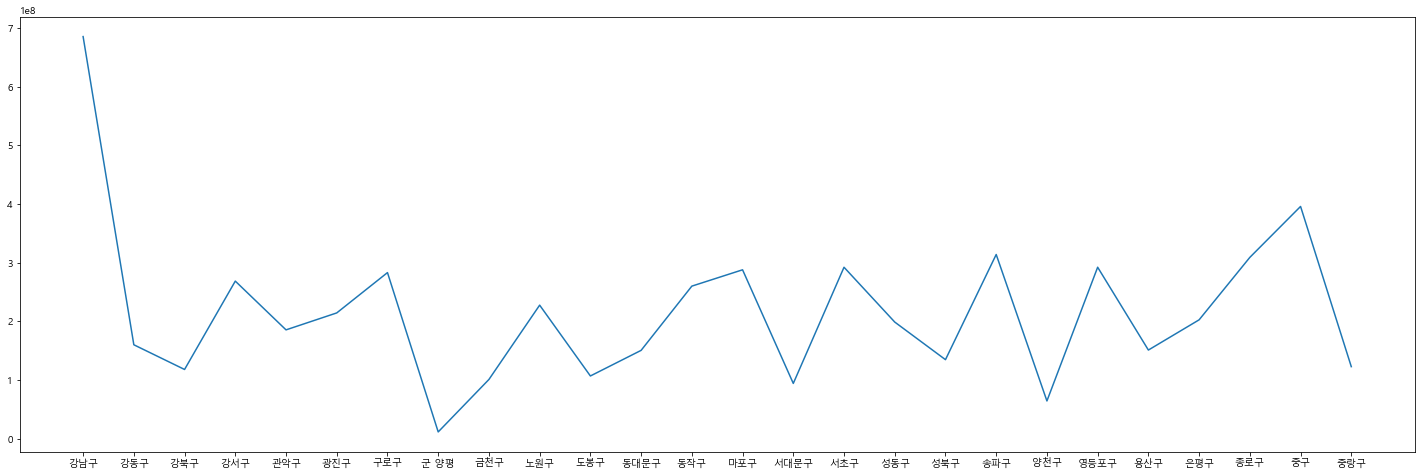

In [74]:
plt.figure(figsize =  (25,8))
plt.plot(gu_user.index, gu_user['월별승하차합계'])
plt.show()

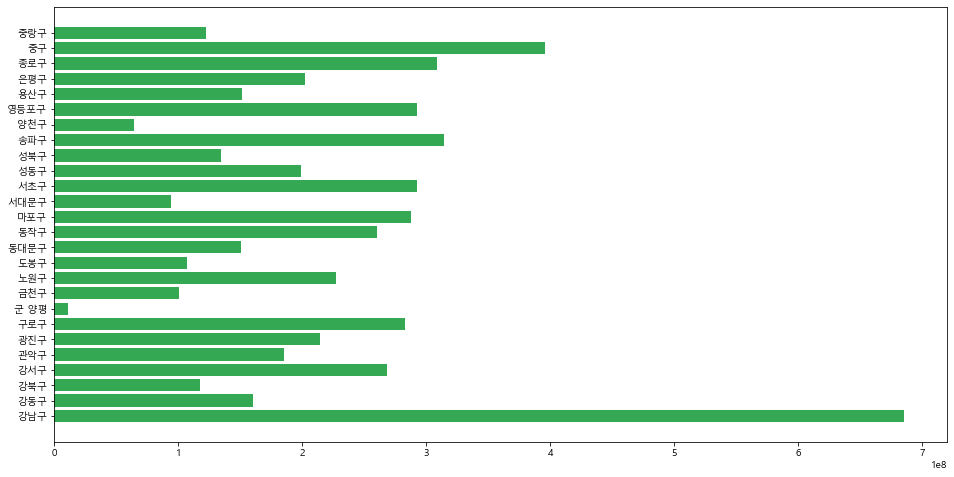

In [75]:
google_colors = ['#4285F4','#EA4335','#FBBC05','#34A853']

fig,ax = plt.subplots(figsize=(16,8))

ax.barh(y=gu_user.index,width=gu_user['월별승하차합계'],color=google_colors[3])
plt.show()

In [76]:
threshold = 2e8
tmp1 = gu_user[gu_user['월별승하차합계'] <= threshold].sort_values('월별승하차합계',ascending=True)
tmp2 = gu_user[gu_user['월별승하차합계'] > threshold].sort_values('월별승하차합계',ascending=True)

In [62]:
ax_font_dict = {'fontsize':12,'fontweight':'bold'}
title_font_dict = {'fontsize':18,'fontweight':'bold'}

In [64]:
yticks = list(np.arange(0,len(gu_user)))
yticklabels = list(tmp1.index)+list(tmp2.index)

<ipython-input-79-3a37db11ae8e>:6: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_yticklabels(yticklabels, ax_font_dict)
<ipython-input-79-3a37db11ae8e>:7: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)
<ipython-input-79-3a37db11ae8e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)


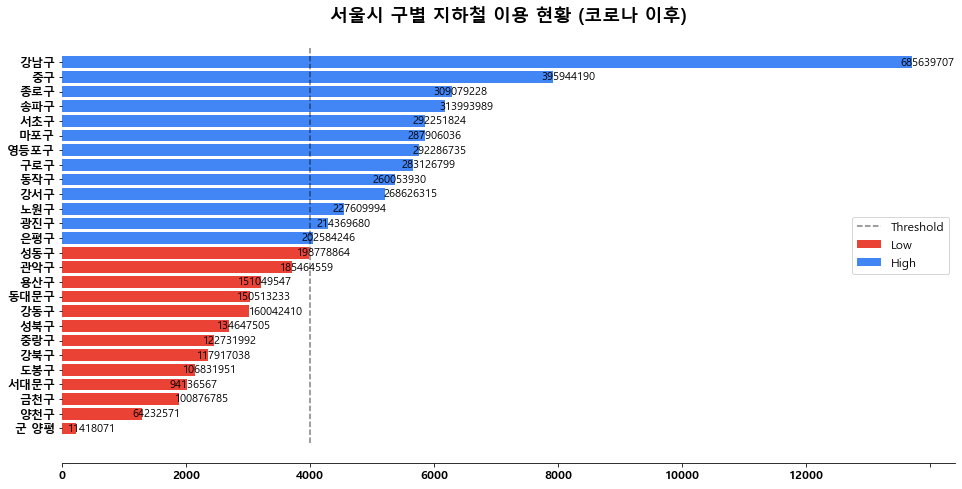

In [79]:
# 참고 : https://jehyunlee.github.io/2020/12/17/Python-DS-48-suneung/

fig, ax = plt.subplots(figsize=(16,8),sharex=True)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, ax_font_dict)
ax.set_xticklabels(np.arange(0,14000,2000), ax_font_dict)

ax.barh(y=tmp1.index,width=tmp1['월별승하차합계'], color=google_colors[1])
ax.barh(y=tmp2.index,width=tmp2['월별승하차합계'], color=google_colors[0])

ax.vlines(threshold, ymin=-1, ymax=gu_user.index.nunique(), linestyles='dashed',alpha=0.5,color='black')
ax.set_title("서울시 구별 지하철 이용 현황 (코로나 이후)", title_font_dict)

ax.legend(labels=["Threshold",'Low','High'], loc='center right',fontsize='large')

for i in yticks:
    xx = gu_user.loc[gu_user.index == yticklabels[i], '월별승하차합계'].values[0]
    ax.annotate(xx, xy = (xx, i), xytext = (15,0),
                textcoords = 'offset points',
                ha='center', va='center', fontsize=11)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

## 아래 부분 생략

In [80]:
코로나 이후(20.02~21.12) 지하철 누적 이용자가 많은 순위
- 강남구
- 중구
- 종로구
- 송파구
- 서초구
- 마포구
- 영등포구
- 구로구
- 동작구
- 강서구

강남구 중구 종로구 송파구 서초구 마포구
영등포구 구로구 동작구 강서구 노원구 광진구
은평구 성동구 관악구 용산구 동대문구
강동구 성북구 중랑구 강북구 도봉구 서대문구 금천구 양천구

SyntaxError: invalid syntax (<ipython-input-80-9b04d6d44d0c>, line 1)

In [ ]:
누적 확진자(20.02~21.12) 많은 순 10위
- 송파구 4위 
- 강남구 1위
- 관악구 10위 안에 없음  
- 구로구 8위 
- 영등포구 7위 
- 강서구 10위
- 노원구 10위 안에 없음 
- 은평구 10위 안에 없음 
- 성북구 10위 안에 없음 
- 동대문구 10위 안에 없음 
--> 확진자가 많이 나온 지역에서 지하철 이용량도 상대적으로 많은지 확인 

--> 지하철 이용량이 10위인 구 중 누적확진자도 10위 안에 드는 구가 총 5개이다. 
--> 5개가 10위 안에 없는데 구별 지하철 이용량과 확진자 수는 상관이 없는 걸까? 
--> 통계적 검정 필요? 
--> 그 전에 구별 인구에 따른 데이터도 한번 살펴보자 
--> 엑셀로 간단히 살펴보자 

In [ ]:
이동 인구와의 관계가 아니라 실제 거주 인구와 관련이 있을까? 

In [ ]:
2021년 기준 전체 인구수 순위 
- 송파구
- 강서구
- 강남구
- 노원구
- 관악구
- 은평구
- 강동구
- 양천구
- 성북구
- 구로구
- 서초구
- 영등포구
- 동작구
- 중랑구
- 마포구
- 광진구
- 동대문구
- 도봉구
- 서대문구
- 강북구
- 성동구
- 금천구
- 용산구
- 종로구
- 중구

In [85]:
tmp = pd.DataFrame(columns = ['2021년기준전체인구수순위','누적 확진자(20.02~21.12)순위','지하철 누적 이용자(20.02~21.12) 순위'])

In [86]:
tmp['2021년기준전체인구수순위'] = ['송파구', '강서구', '강남구', '노원구', '관악구', '은평구', '강동구', '양천구', '성북구', '구로구', '서초구'
,'영등포구', '동작구', '중랑구', '마포구', '광진구', '동대문구', '도봉구', '서대문구', '강북구', '성동구', '금천구', '용산구', '종로구', '중구']

In [87]:
tmp['누적 확진자(20.02~21.12)순위'] = ['송파구','강남구','관악구','구로구', '영등포구','강서구','노원구','은평구',
                               '성북구','동대문구','강동구','동작구','중랑구','서초구','양천구','마포구',
                               '광진구','도봉구','강북구','서대문구','금천구','성동구','용산구','종로구','중구']

In [96]:
tmp['지하철 누적 이용자(20.02~21.12) 순위'] = ['강남구', '중구', '종로구', '송파구', '서초구', '마포구',
'영등포구', '구로구', '동작구', '강서구', '노원구', '광진구',
'은평구', '성동구', '관악구', '용산구', '동대문구',
'강동구', '성북구', '중랑구', '강북구', '도봉구', '서대문구', '금천구', '양천구']

In [97]:
tmp

,2021년기준전체인구수순위,누적 확진자(20.02~21.12)순위,지하철 누적 이용자(20.02~21.12) 순위
0,송파구,송파구,강남구
1,강서구,강남구,중구
2,강남구,관악구,종로구
3,노원구,구로구,송파구
4,관악구,영등포구,서초구
5,은평구,강서구,마포구
6,강동구,노원구,영등포구
7,양천구,은평구,구로구
8,성북구,성북구,동작구
9,구로구,동대문구,강서구


In [ ]:
인구수의 규모에 구애 받지 않도록 
확진자 수 / 인구수 로 계산해보기 

In [98]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FC3B-0613

 C:\Users\Itshony\Desktop\LIKELION\SEMI1 디렉터리

2022-04-05  오전 11:49    <DIR>          .
2022-04-05  오전 11:49    <DIR>          ..
2022-04-05  오전 09:08    <DIR>          .ipynb_checkpoints
2022-04-01  오후 04:51           176,734 0401_전처리시도.ipynb
2022-04-04  오전 11:52           327,120 0404_gu_visual.ipynb
2022-04-05  오전 09:22           356,238 0404_지도시각화.ipynb
2022-04-04  오후 05:50           128,182 0404_지하철이용_위치_매칭.ipynb
2022-04-01  오전 10:51            33,293 2호선_4년간_월별_시간대별_이용수.ipynb
2022-04-01  오후 01:04           104,249 2호선_데이터전처리.ipynb
2022-03-31  오전 09:07         2,815,986 Semi-project 관련 공지사항 & 활용 가능 데이터셋 링크 모음.pdf
2022-04-05  오전 10:52           214,550 Untitled.ipynb
2022-03-31  오후 04:51            16,929 멋사브레인_SEMI1.docx
2022-04-05  오전 11:49             9,538 서울시인구구별.xlsx
2022-04-05  오전 10:20            25,088 서울시주민등록인구(구별).xls
2022-04-04  오후 03:05            79,551 서울시지하철정보.csv
2022-04-04  오후 05:29            84,586 서울시지하철정보_ver2.csv


In [99]:
popul = pd.read_excel("data/서울시인구구별.xlsx")

In [100]:
popul

,자치구,인구계
0,송파구,663965
1,강서구,579768
2,강남구,537800
3,노원구,514946
4,관악구,499449
5,은평구,477173
6,강동구,466472
7,양천구,450487
8,성북구,440142
9,구로구,421163


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
import json
import seaborn as sns
import scipy.stats as stats

In [54]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

In [ ]:
[인구 대비] 서울시 인구대비 확진자 수 
--> 지하철 누적 이용자 비교 

### [인구 대비] 서울시 인구대비 확진자 수

In [2]:
popul = pd.read_excel("data/서울시인구구별.xlsx")

In [5]:
df = pd.read_csv("data/서울시지하철호선별_역별_시간대별_승하차인원_ver2.csv")

In [7]:
df = df[ (df['사용월'] <= 202112) & (df['사용월'] >= 201801)]

In [9]:
df['월별승하차합계'] = df.loc[:, '04시-05시 승차인원':'03시-04시 하차인원'].sum(axis=1)

In [11]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,자치구,월별승하차합계
729,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,1355,0,0,0,0,0,0,20220103,종로구,598363
730,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,1437,1,1,0,1,0,0,20220103,종로구,477540
731,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,841,0,2,0,0,0,0,20220103,중구,2324817
732,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,153,0,1,0,0,0,0,20220103,중구,1139570
733,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,863,0,0,0,0,0,0,20220103,동대문구,715381


In [12]:
gu_user = pd.DataFrame(pd.pivot_table(df[ df['사용월'] >= 202002], index='자치구', aggfunc=np.sum)['월별승하차합계'])

In [13]:
gu_user

,월별승하차합계
자치구,
강남구,685639707
강동구,160042410
강북구,117917038
강서구,268626315
관악구,185464559
광진구,214369680
구로구,283126799
군 양평,11418071
금천구,100876785


In [40]:
gu_user.to_csv("data/자치구별승하차합계.csv")

In [16]:
popul.set_index('자치구',inplace=True)

In [18]:
df_new = pd.concat([popul, gu_user], axis = 1)

In [19]:
df_new.columns

Index(['인구계', '월별승하차합계'], dtype='object')

In [20]:
df_new['인구수대비승하차합계'] = df_new['월별승하차합계'] / df_new['인구계']

In [23]:
corona = pd.read_csv("data/서울특별시 코로나19 자치구별 월별 확진자 발생동향(전체 합계)(최종).csv", encoding ='cp949')

In [30]:
corona.columns

Index(['자치구 기준일', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '전체 합계'],
      dtype='object')

In [32]:
corona = corona[ (corona['자치구 기준일'] != '2022년 1월') & (corona['자치구 기준일'] != '2022년 2월') & (corona['자치구 기준일']!= '2022년 3월')]

In [33]:
corona

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
3,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,2878,1891,3059,2590,3271,2489,3323,4252,2919,65000
4,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1935,1137,1932,1381,1732,1048,1218,1947,1519,32202
5,2021년 10월,509,359,433,454,514,1008,639,840,646,...,1575,665,1019,671,805,480,935,1016,950,17809
6,2021년 9월,401,539,412,587,877,917,668,746,555,...,1413,586,1127,705,1062,659,1243,1678,866,20001
7,2021년 8월,226,254,445,361,522,423,523,517,330,...,616,375,836,674,1009,668,1245,904,447,14205
8,2021년 7월,198,196,478,485,467,377,418,489,354,...,554,317,648,726,1102,772,1276,830,522,13706
9,2021년 6월,63,77,238,227,232,189,178,232,166,...,160,105,262,220,256,339,755,416,269,5737
10,2021년 5월,78,83,166,169,208,243,277,261,254,...,183,144,248,220,235,269,518,445,319,5821
11,2021년 4월,60,65,106,191,241,252,340,205,135,...,144,85,204,275,301,355,439,389,252,5482
12,2021년 3월,63,79,131,139,253,114,188,137,122,...,123,25,127,172,123,158,222,191,249,3568


In [35]:
gu = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

In [34]:
corona_gu_sum = pd.DataFrame(columns=['자치구','누적 확진자(20.02~21.12)'])

In [37]:
for i in gu:
    sum_of_gu = sum(corona[i])
    corona_gu_sum = corona_gu_sum.append({'자치구':i, '누적 확진자(20.02~21.12)':sum_of_gu}, ignore_index=True)

In [39]:
# corona_gu_sum.to_csv("자치구별누적확진자.csv")

In [44]:
corona_gu_sum.set_index('자치구', inplace=True)

In [45]:
df_new = pd.concat([df_new, corona_gu_sum], axis = 1)

In [47]:
df_new['인구수대비 누적확진자'] = df_new['누적 확진자(20.02~21.12)'] / df_new['인구계']

In [51]:
df_new.drop('군 양평', axis = 0, inplace=True)

In [52]:
df_new

,인구계,월별승하차합계,인구수대비승하차합계,누적 확진자(20.02~21.12),인구수대비 누적확진자
자치구,,,,,
송파구,663965.0,313993989,472.907441,13634,0.020534
강서구,579768.0,268626315,463.334153,10436,0.018
강남구,537800.0,685639707,1274.897187,12452,0.023154
노원구,514946.0,227609994,442.007500,9669,0.018777
관악구,499449.0,185464559,371.338333,11265,0.022555
은평구,477173.0,202584246,424.550941,9663,0.020251
강동구,466472.0,160042410,343.091139,9229,0.019785
양천구,450487.0,64232571,142.584738,7965,0.017681
성북구,440142.0,134647505,305.918329,9488,0.021557


### 추가 전처리 - 스케일링
- 인구수 대비 승하차 합계 vs. 인구수 대비 누적 확진자
- 두 개의 스케일 차이가 크다 스케일링 필요

In [58]:
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin 

In [61]:
df_new['인구수대비_승하차합계'] = reRange(df_new['인구수대비승하차합계'], min(df_new['인구수대비승하차합계']), max(df_new['인구수대비승하차합계']), 0, 1)
df_new.head()

,인구계,월별승하차합계,인구수대비승하차합계,누적 확진자(20.02~21.12),인구수대비 누적확진자,인구수대비_승하차합계
자치구,,,,,,
송파구,663965.0,313993989,472.907441,13634,0.020534,0.115423
강서구,579768.0,268626315,463.334153,10436,0.018,0.112078
강남구,537800.0,685639707,1274.897187,12452,0.023154,0.395659
노원구,514946.0,227609994,442.007500,9669,0.018777,0.104626
관악구,499449.0,185464559,371.338333,11265,0.022555,0.079932


In [62]:
df_new['인구수대비_누적확진자'] = reRange(df_new['인구수대비 누적확진자'], min(df_new['인구수대비 누적확진자']), max(df_new['인구수대비 누적확진자']), 0, 1)
df_new.head()

,인구계,월별승하차합계,인구수대비승하차합계,누적 확진자(20.02~21.12),인구수대비 누적확진자,인구수대비_승하차합계,인구수대비_누적확진자
자치구,,,,,,,
송파구,663965.0,313993989,472.907441,13634,0.020534,0.115423,0.280436
강서구,579768.0,268626315,463.334153,10436,0.018,0.112078,0.031395
강남구,537800.0,685639707,1274.897187,12452,0.023154,0.395659,0.537876
노원구,514946.0,227609994,442.007500,9669,0.018777,0.104626,0.107705
관악구,499449.0,185464559,371.338333,11265,0.022555,0.079932,0.479031


In [88]:
df_new['인구수대비_승하차합계']

자치구
송파구     0.115423
강서구     0.112078
강남구     0.395659
노원구     0.104626
관악구     0.079932
은평구     0.098526
강동구     0.070062
양천구     0.000000
성북구     0.057073
구로구     0.185079
서초구     0.195560
영등포구    0.204930
동작구     0.180598
중랑구     0.059612
마포구     0.215837
광진구     0.162601
동대문구    0.099587
도봉구     0.067062
서대문구    0.054384
강북구     0.086358
성동구     0.187502
금천구     0.094114
용산구     0.172613
종로구     0.652439
중구      1.000000
Name: 인구수대비_승하차합계, dtype: float64

In [89]:
df_new['인구수대비_누적확진자']

자치구
송파구     0.280436
강서구     0.031395
강남구     0.537876
노원구     0.107705
관악구     0.479031
은평구     0.252553
강동구      0.20677
양천구          0.0
성북구     0.380927
구로구     0.740566
서초구     0.225017
영등포구    0.838074
동작구     0.453156
중랑구     0.388015
마포구     0.226966
광진구     0.224994
동대문구    0.882642
도봉구     0.329651
서대문구     0.16467
강북구     0.437041
성동구     0.178755
금천구     0.588001
용산구     0.446753
종로구     0.801325
중구           1.0
Name: 인구수대비_누적확진자, dtype: object

### [인구수 대비] 누적 확진자 & 승하차 합계
- 시각화

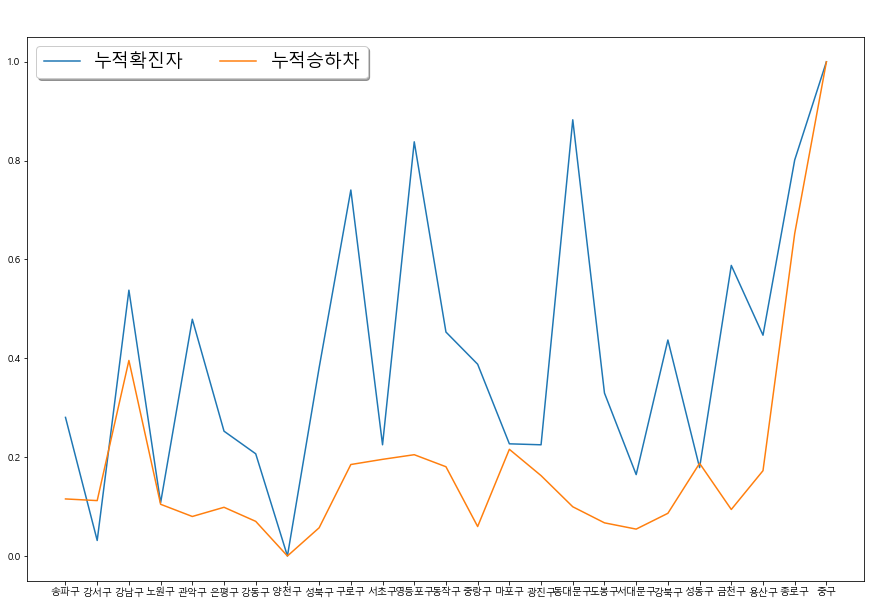

In [78]:
plt.figure(figsize =  (15,10))
plt.plot(df_new.index, df_new['인구수대비_누적확진자'], label='누적확진자')
plt.plot(df_new.index, df_new['인구수대비_승하차합계'], label='누적승하차')
plt.legend(loc='best', ncol=2, fontsize=18, frameon=True, shadow=True)
plt.title('구별 인구수 대비 누적 확진자와 누적 승하차수', fontsize='30', color='white' )
plt.show()

In [80]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='cartodbpositron')
map

In [83]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [85]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='Stamenterrain')

map.choropleth(geo_data = geo_str, 
               data = df_new['인구수대비_누적확진자'],
               columns = [df_new.index, df_new['인구수대비_누적확진자']],
               fill_color = 'YlGn',
               key_on = 'feature.id',
              legend_name = '인구수대비 누적확진자')

map

In [86]:
map = folium.Map(location = [37.564346, 126.982062], zoom_start=11,
                 tiles='Stamenterrain')

map.choropleth(geo_data = geo_str, 
               data = df_new['인구수대비_승하차합계'],
               columns = [df_new.index, df_new['인구수대비_승하차합계']],
               fill_color = 'YlGn',
               key_on = 'feature.id',
              legend_name = '인구수대비 승하차합계')

map

### 통계적 검정 
- 지하철 이용량과 구별 확진자수 와의 관계
- 지하철 이용량이 많으면 구별 확진자수도 많다 
<br>

- 구별로 계산했을 때 그런지 확인
- 시계열로 계산했을 때도 그런지 확인 --> 추가
--> 분기별로 계산해서 추세를 따라가는지 확인할 때

### 1) [인구수 대비] 지하철 이용량과 누적 확진자 간의 상관관계

In [93]:
분석대상 = df_new.loc[:, ['인구수대비_승하차합계','인구수대비_누적확진자']]

In [94]:
분석대상
--> 확진자와 지하철 이용량(승하차합계) 간의 관계를 알아보고 싶다 

,인구수대비_승하차합계,인구수대비_누적확진자
자치구,,
송파구,0.115423,0.280436
강서구,0.112078,0.031395
강남구,0.395659,0.537876
노원구,0.104626,0.107705
관악구,0.079932,0.479031
은평구,0.098526,0.252553
강동구,0.070062,0.20677
양천구,0.000000,0.0
성북구,0.057073,0.380927


In [ ]:
지하철 이용량과 구별 확진자수 와의 관계
지하철 이용량이 많으면 구별 확진자수도 많다 

In [ ]:
독립표본 t-test 분석
--> 두 집단 간의 평균 차이를 검정
--> 남자와 여자 사이의 전반적인 만족도 평균값 사이에 유의미한 차이 

In [ ]:
대응표본 t-test 분석
--> 동일한 모집단으로부터 추출된 두 변수의 평균값을 비교 분석
--> 카이제곱 분석은 범주형 변수를 비교 분석하기 때문에 이 분석에는 적절하지 않음 

In [ ]:
분산 분석 
--> 서로 다른 그룹의 평균에서 분산값을 비교
--> 다양한 당뇨병 약물의 효과를 연구할 목적으로 약물 유형과 그에 따른 혈당 수치 사이의 관계를 설정하고 실험하여 조사

In [ ]:
상관관계분석
--> A가 증가하면 B가 증가한다
--> B가 증가하면 A가 증가한다

In [ ]:
그래서 내가 사용해야 할 것은? 
1) 대응표본 t-test 분석 
--> '송파구'라는 동일한 모집단으로부터 추출된.. 두 변수(승하차합계와 누적확진자)의 값을 비교 분석

2) 상관관계분석
--> A가 증가하면 b가 증가한다 
라는 것이 구별로 동일한 형태라면.. 둘의 어떤(음/양의) 연관성이 있다 
--> 상관계수, 히트맵, p-value 모두 다 나타내기
--> 인구수 대비로 한 경우 / 인구수 대비로 안한 경우 상관계수 값은 어떻게 다른지 확인 

In [96]:
df_corr = 분석대상.copy()

In [111]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 송파구 to 중구
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   인구수대비_승하차합계  25 non-null     float64
 1   인구수대비_누적확진자  25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [113]:
df_corr['인구수대비_누적확진자'] = df_corr['인구수대비_누적확진자'].astype('float')

In [115]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 송파구 to 중구
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   인구수대비_승하차합계  25 non-null     float64
 1   인구수대비_누적확진자  25 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


In [133]:
df_corr.rename(columns = {'인구수대비_승하차합계': '지하철 이용량',
                                '인구수대비_누적확진자':'누적 확진자'}, inplace=True)

In [134]:
df_corr_result = df_corr.corr()

In [135]:
df_corr_result

,지하철 이용량,누적 확진자
지하철 이용량,1.000000,0.606861
누적 확진자,0.606861,1.000000


(array([0.5, 1.5]), [Text(0, 0.5, '지하철 이용량'), Text(0, 1.5, '누적 확진자')])

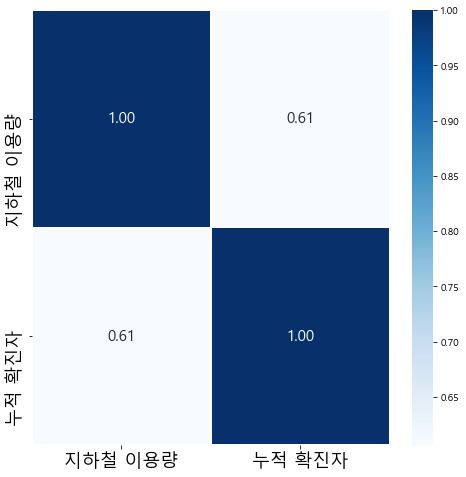

In [159]:
plt.figure(figsize=(8, 8))
sns.heatmap(data= df_corr_result, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues',  annot_kws={"size": 15})
plt.xticks( size=18)
plt.yticks( size=18)

In [127]:
# 피어슨 상관계수 검정 
corr = stats.pearsonr(df_corr['지하철 이용량'], df_corr['누적 확진자'])
corr

(0.6068607483144334, 0.001297725889427266)

#### 결과해석

In [ ]:
결과
지하철 이용량(인구 수 대비), 누적 확진자 (인구 수 대비)

귀무가설(기각) : 상관계수는 0이다 (= 상관 관계가 없다)
대립가설(채택) : 상관계수는 0이 아니다(= 상관 관계가 있다)
    
결과에서 처음 값은 상관계수이고, 두번째 값은 p-value입니다.
--> 상관계수 : 0.60686
--> p-value : 0.00129
    
결과해석
1) p-value 결과해석
p-value가 0.00129로 0.05 보다 작은 값이기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 
=  인구수 대비 지하철 이용량과 누적 확진자 사이의 상관관계가 있다. 

2) 상관계수 결과해석 
--> 피어슨 상관계수는 0.606로 중간 양의 상관관계가 있습니다. 
= 지하철 이용량이 증가하면 누적 확진자도 증가한다
= 누적 확진자가 증가하면 지하철 이용량도 증가한다

### 2) 지하철 이용량과 누적 확진자 간의 상관관계
- 인구수 대비 제거

In [139]:
df_new.columns

Index(['인구계', '월별승하차합계', '인구수대비승하차합계', '누적 확진자(20.02~21.12)', '인구수대비 누적확진자',
       '인구수대비_승하차합계', '인구수대비_누적확진자'],
      dtype='object')

In [141]:
인구제거분석대상 = df_new[['월별승하차합계', '누적 확진자(20.02~21.12)']]

In [145]:
인구제거분석대상.rename(columns = {'월별승하차합계':'지하철 이용량', '누적 확진자(20.02~21.12)': '누적 확진자'}, inplace=True)

In [147]:
df2_corr = 인구제거분석대상.copy()

In [148]:
df2_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 송파구 to 중구
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지하철 이용량  25 non-null     int64 
 1   누적 확진자   25 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [149]:
df2_corr['누적 확진자'] = df2_corr['누적 확진자'].astype('float')

In [150]:
df2_corr

,지하철 이용량,누적 확진자
자치구,,
송파구,313993989,13634.0
강서구,268626315,10436.0
강남구,685639707,12452.0
노원구,227609994,9669.0
관악구,185464559,11265.0
은평구,202584246,9663.0
강동구,160042410,9229.0
양천구,64232571,7965.0
성북구,134647505,9488.0


In [151]:
df2_corr_result = df2_corr.corr()

In [152]:
df2_corr_result

,지하철 이용량,누적 확진자
지하철 이용량,1.000000,0.321106
누적 확진자,0.321106,1.000000


(array([0.5, 1.5]), [Text(0, 0.5, '지하철 이용량'), Text(0, 1.5, '누적 확진자')])

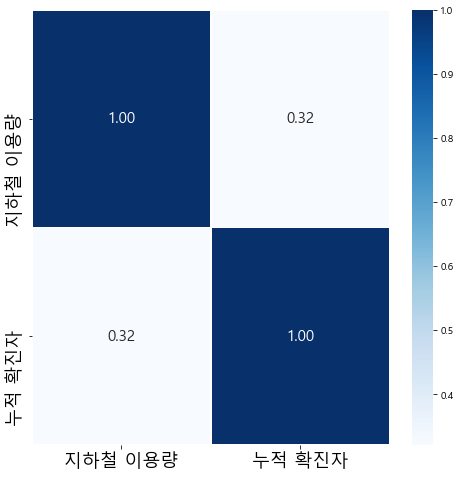

In [160]:
plt.figure(figsize=(8, 8))
sns.heatmap(data= df2_corr_result, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', annot_kws={"size": 15})
plt.xticks( size=18)
plt.yticks( size=18)

In [154]:
df2_corr.columns

Index(['지하철 이용량', '누적 확진자'], dtype='object')

In [155]:
# 피어슨 상관계수 검정 
corr = stats.pearsonr(df2_corr['지하철 이용량'], df2_corr['누적 확진자'])
corr

(0.3211058727068618, 0.11755726294392892)

#### 결과해석 

In [ ]:
결과
지하철 이용량, 누적 확진자 

귀무가설(기각) : 상관계수는 0이다 (= 상관 관계가 없다)
대립가설(채택) : 상관계수는 0이 아니다(= 상관 관계가 있다)
    
결과에서 처음 값은 상관계수이고, 두번째 값은 p-value입니다.
--> 상관계수 : 0.3211
--> p-value :  0.1175
    
결과해석
1) p-value 결과해석
p-value가 0.1175로 0.05 보다 작은 값이기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 
= 지하철 이용량과 누적 확진자 사이의 상관관계가 있다. 

2) 상관계수 결과해석 
--> 피어슨 상관계수는 0.3211로 약한 양의 상관관계가 있습니다. 
= 지하철 이용량이 증가하면 누적 확진자도 증가한다
= 누적 확진자가 증가하면 지하철 이용량도 증가한다

In [ ]:
인구 수 대비를 없앴더니 상관계수자 줄고 p-value가 늘었다 
이유가 뭘까? 